In [1]:
import pandas as pd
import numpy as np

# --- 1. Carga de Datos ---
# Asegúrate de que el archivo "HOMICIDIO_20251026.csv" esté en la misma carpeta que tu notebook
# o proporciona la ruta completa.

df = pd.read_csv(r"C:\Users\johan\OneDrive - Universidad del Norte\Escritorio\proyectos\serie_tiempo\Dataset\HOMICIDIO_20251026.csv")
print("¡Archivo cargado exitosamente!")

¡Archivo cargado exitosamente!


In [2]:
df.head(n=5)

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,ZONA,SEXO,CANTIDAD
0,01/01/2003,11,BOGOTA D.C.,11001,BOGOTA D.C.,URBANA,MASCULINO,1
1,01/01/2003,11,BOGOTA D.C.,11001,BOGOTA D.C.,URBANA,MASCULINO,1
2,01/01/2003,11,BOGOTA D.C.,11001,BOGOTA D.C.,URBANA,MASCULINO,1
3,01/01/2003,11,BOGOTA D.C.,11001,BOGOTA D.C.,URBANA,MASCULINO,1
4,01/01/2003,11,BOGOTA D.C.,11001,BOGOTA D.C.,URBANA,MASCULINO,1


In [3]:
print("\n--- .info() ---")
print("Información de columnas, tipos de datos y nulos:")
# df.info() no imprime bien si se usa con print(), así que lo llamamos directamente.
df.info()


--- .info() ---
Información de columnas, tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331026 entries, 0 to 331025
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   FECHA HECHO   331026 non-null  object
 1   COD_DEPTO     331026 non-null  int64 
 2   DEPARTAMENTO  331026 non-null  object
 3   COD_MUNI      331026 non-null  int64 
 4   MUNICIPIO     331026 non-null  object
 5   ZONA          331026 non-null  object
 6   SEXO          331026 non-null  object
 7   CANTIDAD      331026 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 20.2+ MB


In [4]:
print(f"Dimensiones del dataset (filas, columnas): {df.shape}")

Dimensiones del dataset (filas, columnas): (331026, 8)


In [5]:
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

Conteo de valores nulos por columna:
FECHA HECHO     0
COD_DEPTO       0
DEPARTAMENTO    0
COD_MUNI        0
MUNICIPIO       0
ZONA            0
SEXO            0
CANTIDAD        0
dtype: int64


In [6]:
print("\n--- .describe() (Numérico) ---")
print("Estadísticas de columnas numéricas (como CANTIDAD):")
print(df.describe())


--- .describe() (Numérico) ---
Estadísticas de columnas numéricas (como CANTIDAD):
           COD_DEPTO       COD_MUNI       CANTIDAD
count  331026.000000  331026.000000  331026.000000
mean       39.890722   40146.360676       1.001936
std        28.956878   28966.841308       0.058986
min         5.000000    5001.000000       1.000000
25%        11.000000   11001.000000       1.000000
50%        41.000000   41206.000000       1.000000
75%        73.000000   73168.000000       1.000000
max        99.000000   99773.000000      14.000000


In [7]:
("\n--- .describe(include='object') (Categórico) ---")
print("Estadísticas de columnas de texto (categóricas):")
print(df.describe(include='object'))

Estadísticas de columnas de texto (categóricas):
       FECHA HECHO     DEPARTAMENTO MUNICIPIO    ZONA       SEXO
count       331026           331026    331026  331026     331026
unique        8309               33      1024       2          4
top     01/01/2003  VALLE DEL CAUCA      CALI  URBANA  MASCULINO
freq           144            64977     32353  229445     304348


In [8]:
# --- 1. Conversión de Columna de Fecha ---
# Le decimos a pandas que lea la columna 'FECHA HECHO' usando el formato Día/Mes/Año
try:
    df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
    print("¡Columna 'FECHA HECHO' convertida a datetime exitosamente!")
    
    # Verificamos el rango de fechas
    print(f"Fecha mínima: {df['FECHA HECHO'].min()}")
    print(f"Fecha máxima: {df['FECHA HECHO'].max()}")

except ValueError as e:
    print(f"Error al convertir la fecha: {e}")
    print("Revisa si todas las fechas tienen el formato DD/MM/AAAA.")
    # Si esto falla, tendríamos que detenernos y limpiar fechas, pero crucemos los dedos.

¡Columna 'FECHA HECHO' convertida a datetime exitosamente!
Fecha mínima: 2003-01-01 00:00:00
Fecha máxima: 2025-09-30 00:00:00


In [9]:
# --- 2. Agregación por Mes (Resampling) ---
# Ahora crearemos el DataFrame para la serie de tiempo.
# Queremos que la fecha sea el índice, así que primero la establecemos como índice.
df = df.set_index('FECHA HECHO')

# 'MS' significa 'Month Start' (Inicio de Mes). 
# Agrupará por mes (ej. Enero 2003) y sumará la 'CANTIDAD'.
df_monthly = df.resample('MS')['CANTIDAD'].sum().to_frame()

# Renombramos la columna para que siga siendo 'CANTIDAD' (a veces se pierde el nombre)
df_monthly.columns = ['CANTIDAD']

print("\n--- DataFrame Agregado por Mes (df_monthly.head()) ---")
print(df_monthly.head())

print("\n--- Info del DataFrame Mensual (df_monthly.info()) ---")
df_monthly.info()

print("\n--- Estadísticas del DataFrame Mensual (df_monthly.describe()) ---")
print(df_monthly.describe())


--- DataFrame Agregado por Mes (df_monthly.head()) ---
             CANTIDAD
FECHA HECHO          
2003-01-01       2054
2003-02-01       2017
2003-03-01       2061
2003-04-01       1909
2003-05-01       1995

--- Info del DataFrame Mensual (df_monthly.info()) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2003-01-01 to 2025-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CANTIDAD  273 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB

--- Estadísticas del DataFrame Mensual (df_monthly.describe()) ---
          CANTIDAD
count   273.000000
mean   1214.897436
std     224.146561
min     655.000000
25%    1057.000000
50%    1188.000000
75%    1311.000000
max    2061.000000


In [10]:
# --- Importaciones ---
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Asumiendo que 'df_monthly' ya está cargado en memoria

# --- 1. Gráfico de la Serie Temporal (Evolución) con Plotly ---
print("--- 1. Gráfico Interactivo de Evolución de Homicidios Mensuales (Plotly) ---")

fig1 = px.line(df_monthly, x=df_monthly.index, y='CANTIDAD', 
               title='Homicidios Mensuales en Colombia (2003-2025)')
fig1.update_xaxes(title_text='Año')
fig1.update_yaxes(title_text='Cantidad de Homicidios')
fig1.update_layout(hovermode="x unified") # Mejora el tooltip
fig1.show()

--- 1. Gráfico Interactivo de Evolución de Homicidios Mensuales (Plotly) ---


In [11]:
# --- 2. Descomposición de la Serie con Plotly ---
print("\n--- 2. Descomposición Interactiva de la Serie (Plotly) ---")

# Calculamos la descomposición (period=12 para meses del año)
decomposition = seasonal_decompose(df_monthly['CANTIDAD'], model='additive', period=12)

# Creamos una figura con 4 subplots (uno para cada componente)
fig2 = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    subplot_titles=("Observado", "Tendencia", "Estacionalidad", "Residuo")
)

# Añadimos cada componente al subplot correspondiente
fig2.add_trace(go.Scatter(x=decomposition.observed.index, y=decomposition.observed, name='Observado'),
              row=1, col=1)
fig2.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend, name='Tendencia'),
              row=2, col=1)
fig2.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, name='Estacionalidad'),
              row=3, col=1)
fig2.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid, name='Residuo', mode='markers'), # Residuos como puntos
              row=4, col=1)

# Actualizamos el layout
fig2.update_layout(height=800, title_text="Descomposición de la Serie Temporal", showlegend=False)
fig2.show()


--- 2. Descomposición Interactiva de la Serie (Plotly) ---



--- 3. Gráficos de Autocorrelación (ACF y PACF) (Matplotlib) ---


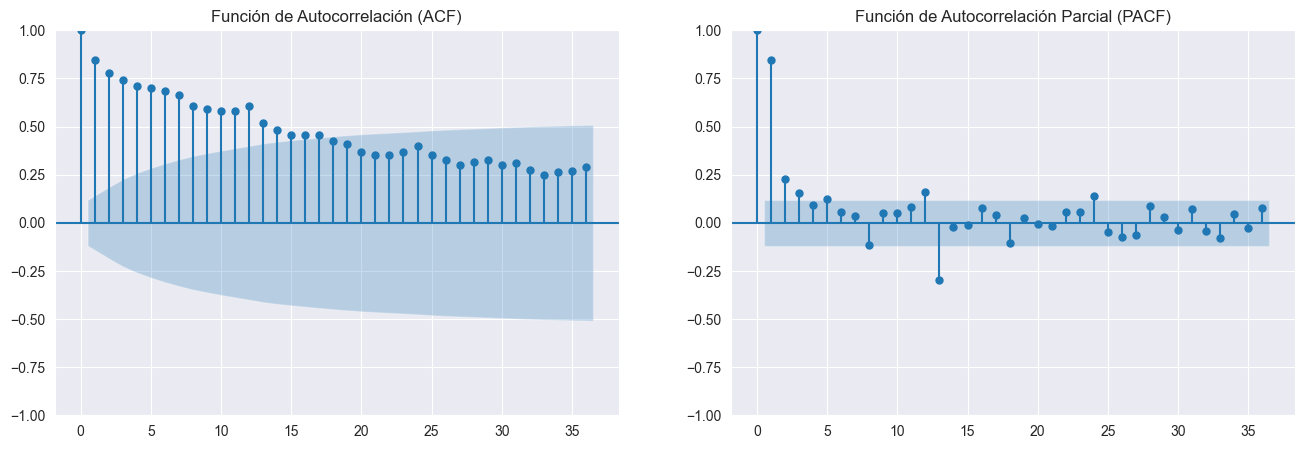

In [12]:
# --- 3. Gráficos de Autocorrelación (ACF y PACF) con Matplotlib/Statsmodels ---
print("\n--- 3. Gráficos de Autocorrelación (ACF y PACF) (Matplotlib) ---")

# Configuración de estilo
sns.set_style('darkgrid')

# Creamos la figura de matplotlib con 1 fila y 2 columnas
fig, ax = plt.subplots(1, 2, figsize=(16, 5)) 

# Gráfico ACF (Autocorrelation Function)
plot_acf(df_monthly['CANTIDAD'], lags=36, ax=ax[0])
ax[0].set_title('Función de Autocorrelación (ACF)')

# Gráfico PACF (Partial Autocorrelation Function)
plot_pacf(df_monthly['CANTIDAD'], lags=36, ax=ax[1])
ax[1].set_title('Función de Autocorrelación Parcial (PACF)')

plt.show() # Muestra el set de gráficos de matplotlib

In [13]:
from statsmodels.tsa.stattools import adfuller

print('--- Prueba de Dickey-Fuller Aumentada (ADF Test) ---')
print('Analizando df_monthly["CANTIDAD"]...')

# 1. Realizar el test
# 'autolag="AIC"' permite que el test seleccione automáticamente el número
# óptimo de lags (retrasos) a incluir.
result = adfuller(df_monthly['CANTIDAD'], autolag='AIC')

# 2. Extraer e imprimir los resultados
print(f'Estadístico ADF: {result[0]}')
print(f'p-value: {result[1]}')
print('Valores Críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# 3. Interpretación
print('\n--- Interpretación ---')
if result[1] > 0.05:
    print(f"El p-value ({result[1]:.4f}) es mayor que 0.05.")
    print("Conclusión: La serie es NO ESTACIONARIA.")
    print("Esto confirma nuestro análisis visual (presencia de tendencia).")
else:
    print(f"El p-value ({result[1]:.4f}) es menor o igual a 0.05.")
    print("Conclusión: La serie ES ESTACIONARIA.")

--- Prueba de Dickey-Fuller Aumentada (ADF Test) ---
Analizando df_monthly["CANTIDAD"]...
Estadístico ADF: -3.8393187791761583
p-value: 0.0025297018311421205
Valores Críticos:
   1%: -3.4561550092339512
   5%: -2.8728972266578676
   10%: -2.5728222369384763

--- Interpretación ---
El p-value (0.0025) es menor o igual a 0.05.
Conclusión: La serie ES ESTACIONARIA.


In [14]:
import plotly.graph_objects as go

# --- 1. Definir la Fecha de Corte ---
# Usaremos todo hasta el final de 2023 para entrenar
# y 2024-2025 para probar.
split_date = '2024-01-01'

# --- 2. Crear los conjuntos de Train y Test ---
# Train: Todos los datos ANTES de la fecha de corte
train = df_monthly[df_monthly.index < split_date]

# Test: Todos los datos DESDE la fecha de corte en adelante
test = df_monthly[df_monthly.index >= split_date]

# --- 3. Verificar la División ---
print(f"--- División de Datos ---")
print(f"Total de meses en el dataset: {len(df_monthly)}")
print(f"Meses para Entrenamiento (Train): {len(train)} (Desde {train.index.min().date()} hasta {train.index.max().date()})")
print(f"Meses para Prueba (Test):      {len(test)} (Desde {test.index.min().date()} hasta {test.index.max().date()})")


# --- 4. Visualizar la División (¡Importante!) ---
print("\n--- Visualizando la división Train/Test ---")

fig = go.Figure()

# Añadir serie de Entrenamiento
fig.add_trace(go.Scatter(
    x=train.index, 
    y=train['CANTIDAD'], 
    mode='lines', 
    name='Train (Entrenamiento)'
))

# Añadir serie de Prueba
fig.add_trace(go.Scatter(
    x=test.index, 
    y=test['CANTIDAD'], 
    mode='lines', 
    name='Test (Prueba)',
    line=dict(color='orange')
))

fig.update_layout(
    title='Verificación de la División Train/Test',
    xaxis_title='Año',
    yaxis_title='Cantidad de Homicidios',
    hovermode="x unified"
)

# Añadir una línea vertical para ver el corte
fig.add_vline(x=split_date, line_width=2, line_dash="dash", line_color="red")

fig.show()

--- División de Datos ---
Total de meses en el dataset: 273
Meses para Entrenamiento (Train): 252 (Desde 2003-01-01 hasta 2023-12-01)
Meses para Prueba (Test):      21 (Desde 2024-01-01 hasta 2025-09-01)

--- Visualizando la división Train/Test ---


In [15]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
import plotly.graph_objects as go
import warnings

# Ignorar advertencias comunes de statsmodels para una salida más limpia
warnings.filterwarnings("ignore")

print("--- FASE 1 - PASO 5 (Corregido): Auto-ARIMA con d=1 y D=1 ---")
print("Buscando los mejores parámetros para SARIMA...")
print("Esto puede tardar unos minutos...")

# --- 1. Encontrar el mejor modelo con auto_arima (FORZANDO d y D) ---
# Le pasamos nuestro set de entrenamiento
auto_model = pm.auto_arima(
    train['CANTIDAD'], 
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    m=12,             # Frecuencia de 12 meses
    seasonal=True,    # Activa la estacionalidad
    
    # --- LA CORRECCIÓN ESTÁ AQUÍ ---
    d=1,              # Forzamos d=1 (basado en el test ADF)
    D=1,              # Forzamos D=1 (para evitar el error y manejar la estacionalidad)
    test='adf',       # Ya no es necesario, pero lo dejamos para d (aunque d=1 lo sobreescribe)
    # --- Fin de la corrección ---
    
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True     # Búsqueda rápida
)

# --- 2. Imprimir el resumen del MEJOR modelo encontrado ---
print("\n--- Resumen del Mejor Modelo Encontrado ---")
print(auto_model.summary())

# --- 3. Generar Predicciones ---
n_periods = len(test)
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Convertimos el forecast a una Serie de Pandas con el índice correcto (el del 'test' set)
forecast_series = pd.Series(forecast, index=test.index)

# --- 4. Calcular Métricas de Error ---
print("\n--- Evaluación del Modelo (Enfoque 1: Split Fijo) ---")
mae = mean_absolute_error(test['CANTIDAD'], forecast_series)
mape = mean_absolute_percentage_error(test['CANTIDAD'], forecast_series)
rmse = np.sqrt(mean_squared_error(test['CANTIDAD'], forecast_series))

print(f"MAE (Error Absoluto Medio):   {mae:.2f} homicidios")
print(f"RMSE (Raíz del Error Cuadr.): {rmse:.2f} homicidios")
print(f"MAPE (Error % Absoluto Medio): {mape*100:.2f} %")

# --- 5. Visualizar los Resultados ---
print("\n--- Gráfico de Predicción vs. Real (Enfoque 1) ---")

fig = go.Figure()
# (El código de visualización es idéntico al anterior, no es necesario cambiarlo)
# Datos de Entrenamiento
fig.add_trace(go.Scatter(
    x=train.index, 
    y=train['CANTIDAD'], 
    mode='lines', 
    name='Train (Entrenamiento)'
))
# Datos Reales de Prueba
fig.add_trace(go.Scatter(
    x=test.index, 
    y=test['CANTIDAD'], 
    mode='lines', 
    name='Test (Real)',
    line=dict(color='orange')
))
# Predicción (Forecast)
fig.add_trace(go.Scatter(
    x=forecast_series.index, 
    y=forecast_series, 
    mode='lines', 
    name='Forecast (Predicción)',
    line=dict(color='limegreen', dash='dot')
))
# Intervalos de Confianza (Sombra)
fig.add_trace(go.Scatter(
    x=test.index,
    y=conf_int[:, 0], # Límite inferior
    fill=None,
    mode='lines',
    line=dict(color='limegreen', width=0),
    name='Límite Inferior 95%',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=test.index,
    y=conf_int[:, 1], # Límite superior
    fill='tonexty', # Rellena hasta la traza anterior (límite inferior)
    mode='lines',
    line=dict(color='limegreen', width=0),
    name='Intervalo de Confianza 95%',
    showlegend=True,
    fillcolor='rgba(152, 251, 152, 0.3)' # Color verde claro semitransparente
))
fig.update_layout(
    title='Enfoque 1: Predicción SARIMA vs. Datos Reales (2024-2025)',
    xaxis_title='Año',
    yaxis_title='Cantidad de Homicidios',
    hovermode="x unified"
)
fig.show()

--- FASE 1 - PASO 5 (Corregido): Auto-ARIMA con d=1 y D=1 ---
Buscando los mejores parámetros para SARIMA...
Esto puede tardar unos minutos...
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2941.539, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2893.474, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2917.040, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2869.184, Time=0.37 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.00 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2895.870, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2843.998, Time=0.47 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2866.872, Time=0.24 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(2,1,0)(1,1,1)[12]           

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

print("--- FASE 1 - PASO 6: Validación Cruzada (Enfoque 2: Rolling Forecast -sarima) ---")

# --- 1. Definir los parámetros del modelo que encontramos ---
# (p,d,q) x (P,D,Q,m)
model_order = (1, 1, 2)
seasonal_order = (2, 1, 0, 12)

# --- 2. Definir los años que vamos a 'cortar' ---
# Vamos a predecir 2022, 2023 y 2024
years_to_predict = [2022, 2023, 2024]

# --- 3. Listas para guardar los resultados de cada 'fold' (año) ---
metrics_list = []

for year in years_to_predict:
    # Definimos el corte de entrenamiento (todo HASTA el año a predecir)
    train_end_date = f'{year-1}-12-31'
    
    # Definimos el corte de prueba (todo el año a predecir)
    test_start_date = f'{year}-01-01'
    test_end_date = f'{year}-12-31'
    
    # Creamos los sets de train y test para ESTE BUCLE
    # Usamos df_monthly (el dataset COMPLETO)
    cv_train = df_monthly[df_monthly.index <= train_end_date]
    cv_test = df_monthly[(df_monthly.index >= test_start_date) & (df_monthly.index <= test_end_date)]
    
    # Si no hay datos de prueba (ej. si intentamos predecir 2026), nos saltamos el bucle
    if cv_test.empty:
        continue
        
    print(f"\n--- Fold: Prediciendo el año {year} ---")
    print(f"Entrenando con {len(cv_train)} meses (hasta {train_end_date})...")
    
    # --- 4. Entrenar el modelo con los parámetros fijos ---
    # Usamos los parámetros que encontramos en el Paso 5
    model = SARIMAX(
        cv_train['CANTIDAD'],
        order=model_order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    
    # Entrenamos el modelo
    # 'disp=False' es para no imprimir todo el resumen cada vez
    results = model.fit(disp=False)
    
    # --- 5. Predecir los 12 meses del año ---
    n_periods = len(cv_test)
    forecast = results.get_forecast(steps=n_periods)
    forecast_series = pd.Series(forecast.predicted_mean, index=cv_test.index)
    
    # --- 6. Calcular métricas para este fold ---
    mae = mean_absolute_error(cv_test['CANTIDAD'], forecast_series)
    mape = mean_absolute_percentage_error(cv_test['CANTIDAD'], forecast_series)
    rmse = np.sqrt(mean_squared_error(cv_test['CANTIDAD'], forecast_series))
    
    print(f"Resultados para {year}: MAE={mae:.2f}, MAPE={mape*100:.2f}%")
    
    # Guardamos los resultados
    metrics_list.append({
        'Año Predicho': year,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    })

# --- 7. Calcular y mostrar los resultados PROMEDIO ---
print("\n--- Resultados Promedio de la Validación Cruzada (Enfoque 2) ---")
# Convertimos la lista de métricas a un DataFrame de pandas para verlo bonito
df_metrics = pd.DataFrame(metrics_list)
print(df_metrics)

print("\n--- Promedio de Métricas (Robustez) ---")
print(f"MAE Promedio:   {df_metrics['MAE'].mean():.2f} homicidios")
print(f"RMSE Promedio:  {df_metrics['RMSE'].mean():.2f} homicidios")
print(f"MAPE Promedio:  {df_metrics['MAPE'].mean()*100:.2f} %")

--- FASE 1 - PASO 6: Validación Cruzada (Enfoque 2: Rolling Forecast -sarima) ---

--- Fold: Prediciendo el año 2022 ---
Entrenando con 228 meses (hasta 2021-12-31)...
Resultados para 2022: MAE=64.96, MAPE=5.89%

--- Fold: Prediciendo el año 2023 ---
Entrenando con 240 meses (hasta 2022-12-31)...
Resultados para 2023: MAE=57.01, MAPE=5.07%

--- Fold: Prediciendo el año 2024 ---
Entrenando con 252 meses (hasta 2023-12-31)...
Resultados para 2024: MAE=51.18, MAPE=4.56%

--- Resultados Promedio de la Validación Cruzada (Enfoque 2) ---
   Año Predicho        MAE      MAPE       RMSE
0          2022  64.960877  0.058935  83.723589
1          2023  57.010455  0.050668  61.512380
2          2024  51.176234  0.045564  73.168099

--- Promedio de Métricas (Robustez) ---
MAE Promedio:   57.72 homicidios
RMSE Promedio:  72.80 homicidios
MAPE Promedio:  5.17 %


In [17]:
import pandas as pd
# Asumiendo que 'df_monthly' (nuestra serie mensual) sigue en memoria

# 1. Creamos una copia para el modelo de ML
df_ml = df_monthly.copy()

# 2. Ingeniería de Características (Features)
print("Creando características (features) para XGBoost...")

# --- Características basadas en el Tiempo ---
# El modelo necesita saber qué mes es (para la estacionalidad)
df_ml['mes'] = df_ml.index.month 
# El modelo necesita saber el año (para la tendencia)
df_ml['año'] = df_ml.index.year

# --- Características basadas en Lags (Valores Pasados) ---
# 'Lag 1': El valor del mes anterior. (La inercia más reciente)
df_ml['lag_1'] = df_ml['CANTIDAD'].shift(1)

# 'Lag 12': El valor de hace un año. (La inercia estacional)
df_ml['lag_12'] = df_ml['CANTIDAD'].shift(12)

# --- Características de Medias Móviles (para suavizar) ---
# Media móvil de los 3 meses anteriores
df_ml['media_movil_3'] = df_ml['CANTIDAD'].shift(1).rolling(window=3).mean()

print("¡Características creadas!")

# 3. Limpiar los NaN (Valores Nulos)
# Al crear lags (ej. lag_12), los primeros 12 meses no tienen
# un valor de "hace un año". Esos meses no nos sirven para entrenar.
print("\n--- DataFrame antes de limpiar NaN (primeros 15 meses) ---")
print(df_ml.head(15))

# Eliminamos todas las filas que tengan al menos un valor NaN
df_ml = df_ml.dropna()

print("\n--- DataFrame después de limpiar NaN (primeros 5 meses) ---")
print(df_ml.head(5))

print(f"\nDimensiones del DataFrame para ML (filas, columnas): {df_ml.shape}")

Creando características (features) para XGBoost...
¡Características creadas!

--- DataFrame antes de limpiar NaN (primeros 15 meses) ---
             CANTIDAD  mes   año   lag_1  lag_12  media_movil_3
FECHA HECHO                                                    
2003-01-01       2054    1  2003     NaN     NaN            NaN
2003-02-01       2017    2  2003  2054.0     NaN            NaN
2003-03-01       2061    3  2003  2017.0     NaN            NaN
2003-04-01       1909    4  2003  2061.0     NaN    2044.000000
2003-05-01       1995    5  2003  1909.0     NaN    1995.666667
2003-06-01       1805    6  2003  1995.0     NaN    1988.333333
2003-07-01       1868    7  2003  1805.0     NaN    1903.000000
2003-08-01       1930    8  2003  1868.0     NaN    1889.333333
2003-09-01       1667    9  2003  1930.0     NaN    1867.666667
2003-10-01       1585   10  2003  1667.0     NaN    1821.666667
2003-11-01       1837   11  2003  1585.0     NaN    1727.333333
2003-12-01       1891   12  200

In [18]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
import plotly.graph_objects as go
import warnings

warnings.filterwarnings("ignore")

print("--- FASE 1.5 - PASO 2: Entrenamiento y Evaluación de XGBoost ---")

# --- 1. Definir X (features) e y (target) ---
# X son todas las columnas MENOS 'CANTIDAD'
X = df_ml.drop('CANTIDAD', axis=1) 
# y es SOLO la columna 'CANTIDAD'
y = df_ml['CANTIDAD']

# --- 2. División Cronológica (¡IGUAL que con SARIMA!) ---
split_date = '2024-01-01'
# Creamos máscaras de booleanos para las fechas
train_mask = X.index < split_date
test_mask = X.index >= split_date

# Aplicamos las máscaras
X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"Meses para Entrenamiento (Train): {len(X_train)}")
print(f"Meses para Prueba (Test):      {len(X_test)}")

# --- 3. Crear y Entrenar el Modelo XGBoost ---
# XGBRegressor es para problemas de regresión (predecir un número)
# n_estimators=1000 -> 1000 "árboles" de decisión
# learning_rate=0.01 -> Tasa de aprendizaje pequeña
# early_stopping_rounds=50 -> Si no mejora en 50 árboles, se detiene
print("\nEntrenando modelo XGBoost...")
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror', # Objetivo: minimizar el error cuadrático
    n_estimators=1000,
    learning_rate=0.01,
    early_stopping_rounds=50,
    random_state=42
)

# El 'eval_set' es clave para el early stopping
# El modelo se "mirará" en el set de prueba (X_test) para saber cuándo parar
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False # Poner 'True' si quieres ver el log de entrenamiento
)
print("¡Modelo XGBoost entrenado!")

# --- 4. Generar Predicciones ---
forecast_xgb = model_xgb.predict(X_test)

# Convertimos el forecast a una Serie de Pandas con el índice correcto
forecast_xgb_series = pd.Series(forecast_xgb, index=y_test.index)

# --- 5. Calcular Métricas de Error ---
print("\n--- Evaluación del Modelo (XGBoost) ---")
mae_xgb = mean_absolute_error(y_test, forecast_xgb_series)
mape_xgb = mean_absolute_percentage_error(y_test, forecast_xgb_series)
rmse_xgb = np.sqrt(mean_squared_error(y_test, forecast_xgb_series))

print(f"MAE (Error Absoluto Medio):   {mae_xgb:.2f} homicidios")
print(f"RMSE (Raíz del Error Cuadr.): {rmse_xgb:.2f} homicidios")
print(f"MAPE (Error % Absoluto Medio): {mape_xgb*100:.2f} %")

# --- 6. Visualizar los Resultados ---
print("\n--- Gráfico de Predicción XGBoost vs. Real (2024-2025) ---")

fig = go.Figure()

# Datos Reales de Prueba (Test)
fig.add_trace(go.Scatter(
    x=y_test.index, 
    y=y_test, 
    mode='lines', 
    name='Test (Real)',
    line=dict(color='orange')
))

# Predicción (Forecast) de XGBoost
fig.add_trace(go.Scatter(
    x=forecast_xgb_series.index, 
    y=forecast_xgb_series, 
    mode='lines', 
    name='Forecast (Predicción XGBoost)',
    line=dict(color='blue', dash='dot')
))

fig.update_layout(
    title='Evaluación XGBoost: Predicción vs. Datos Reales (2024-2025)',
    xaxis_title='Año',
    yaxis_title='Cantidad de Homicidios',
    hovermode="x unified"
)
fig.show()

--- FASE 1.5 - PASO 2: Entrenamiento y Evaluación de XGBoost ---
Meses para Entrenamiento (Train): 240
Meses para Prueba (Test):      21

Entrenando modelo XGBoost...
¡Modelo XGBoost entrenado!

--- Evaluación del Modelo (XGBoost) ---
MAE (Error Absoluto Medio):   50.33 homicidios
RMSE (Raíz del Error Cuadr.): 61.11 homicidios
MAPE (Error % Absoluto Medio): 4.59 %

--- Gráfico de Predicción XGBoost vs. Real (2024-2025) ---


In [19]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

print("--- FASE 1.5 - PASO 3: Validación Cruzada XGBoost (Enfoque 2: Rolling Forecast) ---")

# --- 1. Definir los años que vamos a 'cortar' ---
# (Usamos los mismos que con SARIMA)
years_to_predict = [2022, 2023, 2024]

# --- 2. Listas para guardar los resultados de cada 'fold' ---
metrics_list_xgb = []

# --- 3. Definir X (features) e y (target) del dataset COMPLETO de ML ---
# (Recordemos que df_ml ya fue limpiado de NaNs y empieza en 2004)
X_full = df_ml.drop('CANTIDAD', axis=1) 
y_full = df_ml['CANTIDAD']

for year in years_to_predict:
    # --- 4. Definir las fechas de corte para ESTE BUCLE ---
    train_end_date = f'{year-1}-12-31'
    test_start_date = f'{year}-01-01'
    test_end_date = f'{year}-12-31'
    
    # Creamos máscaras de booleanos
    train_mask = X_full.index <= train_end_date
    test_mask = (X_full.index >= test_start_date) & (X_full.index <= test_end_date)
    
    # Aplicamos las máscaras
    X_train_fold, X_test_fold = X_full[train_mask], X_full[test_mask]
    y_train_fold, y_test_fold = y_full[train_mask], y_full[test_mask]

    # Si no hay datos de prueba, saltamos
    if X_test_fold.empty:
        continue
        
    print(f"\n--- Fold: Prediciendo el año {year} ---")
    print(f"Entrenando con {len(X_train_fold)} meses (hasta {train_end_date})...")
    
    # --- 5. Entrenar un NUEVO modelo XGBoost para este fold ---
    model_xgb_fold = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=1000,
        learning_rate=0.01,
        early_stopping_rounds=50, # Usamos el test set del fold para el early stopping
        random_state=42
    )
    
    model_xgb_fold.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
        verbose=False # No queremos el log de 1000 árboles 3 veces
    )
    
    # --- 6. Predecir los 12 meses del año (o los que haya) ---
    forecast_fold = model_xgb_fold.predict(X_test_fold)
    forecast_fold_series = pd.Series(forecast_fold, index=y_test_fold.index)
    
    # --- 7. Calcular métricas para este fold ---
    mae = mean_absolute_error(y_test_fold, forecast_fold_series)
    mape = mean_absolute_percentage_error(y_test_fold, forecast_fold_series)
    rmse = np.sqrt(mean_squared_error(y_test_fold, forecast_fold_series))
    
    print(f"Resultados para {year}: MAE={mae:.2f}, MAPE={mape*100:.2f}%")
    
    # Guardamos los resultados
    metrics_list_xgb.append({
        'Año Predicho': year,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    })

# --- 8. Calcular y mostrar los resultados PROMEDIO ---
print("\n--- Resultados Promedio de la Validación Cruzada (XGBoost) ---")
df_metrics_xgb = pd.DataFrame(metrics_list_xgb)
print(df_metrics_xgb)

print("\n--- Promedio de Métricas (Robustez XGBoost) ---")
print(f"MAE Promedio:   {df_metrics_xgb['MAE'].mean():.2f} homicidios")
print(f"RMSE Promedio:  {df_metrics_xgb['RMSE'].mean():.2f} homicidios")
print(f"MAPE Promedio:  {df_metrics_xgb['MAPE'].mean()*100:.2f} %")

--- FASE 1.5 - PASO 3: Validación Cruzada XGBoost (Enfoque 2: Rolling Forecast) ---

--- Fold: Prediciendo el año 2022 ---
Entrenando con 216 meses (hasta 2021-12-31)...
Resultados para 2022: MAE=65.62, MAPE=6.01%

--- Fold: Prediciendo el año 2023 ---
Entrenando con 228 meses (hasta 2022-12-31)...
Resultados para 2023: MAE=51.54, MAPE=4.61%

--- Fold: Prediciendo el año 2024 ---
Entrenando con 240 meses (hasta 2023-12-31)...
Resultados para 2024: MAE=43.29, MAPE=3.83%

--- Resultados Promedio de la Validación Cruzada (XGBoost) ---
   Año Predicho        MAE      MAPE       RMSE
0          2022  65.619934  0.060051  81.245099
1          2023  51.541210  0.046118  63.019367
2          2024  43.294262  0.038252  50.881833

--- Promedio de Métricas (Robustez XGBoost) ---
MAE Promedio:   53.49 homicidios
RMSE Promedio:  65.05 homicidios
MAPE Promedio:  4.81 %


In [20]:
import xgboost as xgb
import pandas as pd
import numpy as np
import plotly.graph_objects as go

print("--- FASE 1.7 (Final): XGBoost con IC y color verde ---")

# --- 1. Definir X e y FINALES (Todos los datos) ---
X_full = df_ml.drop('CANTIDAD', axis=1)
y_full = df_ml['CANTIDAD']

# --- 2. Entrenar los TRES Modelos Finales ---
print(f"Entrenando 3 modelos XGBoost con TODOS los {len(X_full)} meses...")

# Modelo 1: Predicción Media (El que ya teníamos)
final_model_xgb_mean = xgb.XGBRegressor(
    objective='reg:squarederror', # Objetivo: predecir el promedio
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42
)
final_model_xgb_mean.fit(X_full, y_full)

# Modelo 2: Límite Inferior (Cuantil 5%)
final_model_xgb_lower = xgb.XGBRegressor(
    objective='reg:quantileerror', # Objetivo: regresión de cuantil
    quantile_alpha=0.05,          # Cuantil 5%
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42
)
final_model_xgb_lower.fit(X_full, y_full)

# Modelo 3: Límite Superior (Cuantil 95%)
final_model_xgb_upper = xgb.XGBRegressor(
    objective='reg:quantileerror', # Objetivo: regresión de cuantil
    quantile_alpha=0.95,          # Cuantil 95%
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42
)
final_model_xgb_upper.fit(X_full, y_full)

print("¡3 modelos XGBoost entrenados!")

# --- 3. Proceso de Predicción Recursiva (para los 3 modelos) ---
n_steps_future = 3 # Oct, Nov, Dic
future_dates = pd.date_range(start=df_ml.index.max() + pd.DateOffset(months=1), periods=n_steps_future, freq='MS')

# Listas para guardar las 3 predicciones
predictions_mean = []
predictions_lower = []
predictions_upper = []

data_recursive = df_ml.copy()

for date in future_dates:
    # --- 3a. Crear features para la NUEVA fecha ---
    last_data = data_recursive.iloc[-12:, :] 
    lag_1 = data_recursive['CANTIDAD'].iloc[-1]
    lag_12 = data_recursive['CANTIDAD'].iloc[-12]
    media_movil_3 = data_recursive['CANTIDAD'].iloc[-3:].mean()
    
    features = {'mes': date.month, 'año': date.year, 'lag_1': lag_1, 'lag_12': lag_12, 'media_movil_3': media_movil_3}
    features_df = pd.DataFrame(features, index=[date])
    
    # --- 3b. Predecir con los 3 modelos ---
    pred_mean = final_model_xgb_mean.predict(features_df)[0]
    pred_lower = final_model_xgb_lower.predict(features_df)[0]
    pred_upper = final_model_xgb_upper.predict(features_df)[0]
    
    predictions_mean.append(pred_mean)
    predictions_lower.append(pred_lower)
    predictions_upper.append(pred_upper)
    
    # --- 3c. Añadir la predicción MEDIA a los datos (para el siguiente bucle) ---
    # Usamos la predicción media como el 'lag' para el siguiente paso
    new_row = features_df.copy()
    new_row['CANTIDAD'] = pred_mean 
    data_recursive = pd.concat([data_recursive, new_row[data_recursive.columns]])

# Convertimos las predicciones a Series
forecast_series_mean = pd.Series(predictions_mean, index=future_dates)
forecast_series_lower = pd.Series(predictions_lower, index=future_dates)
forecast_series_upper = pd.Series(predictions_upper, index=future_dates)

# --- 4. Guardar los 3 modelos (Opcional, pero bueno) ---
final_model_xgb_mean.save_model("xgb_final_model_mean.json")
final_model_xgb_lower.save_model("xgb_final_model_lower.json")
final_model_xgb_upper.save_model("xgb_final_model_upper.json")
print("\nModelos XGBoost (mean, lower, upper) guardados.")

# --- 5. Generar el Gráfico Final (Enganchado, Verde y con Sombra) ---
last_date_hist = y_full.index[-1]
last_value_hist = y_full.iloc[-1]

# Conectamos las 3 series de predicción al último punto
connected_forecast_mean = pd.concat([pd.Series([last_value_hist], index=[last_date_hist]), forecast_series_mean])
connected_forecast_lower = pd.concat([pd.Series([last_value_hist], index=[last_date_hist]), forecast_series_lower])
connected_forecast_upper = pd.concat([pd.Series([last_value_hist], index=[last_date_hist]), forecast_series_upper])

# Graficar
fig = go.Figure()

# Histórico
fig.add_trace(go.Scatter(x=y_full.index, y=y_full, mode='lines', name='Datos Históricos (Reales)'))

# Sombra de Confianza (Graficamos esto primero para que quede de fondo)
# Límite inferior (conectado)
fig.add_trace(go.Scatter(
    x=connected_forecast_lower.index,
    y=connected_forecast_lower,
    fill=None,
    mode='lines',
    line=dict(color='limegreen', width=0),
    showlegend=False
))
# Límite superior (conectado)
fig.add_trace(go.Scatter(
    x=connected_forecast_upper.index,
    y=connected_forecast_upper,
    fill='tonexty', 
    mode='lines',
    line=dict(color='limegreen', width=0),
    name='Intervalo de Confianza 95%',
    showlegend=True,
    fillcolor='rgba(152, 251, 152, 0.3)' # Verde semitransparente
))

# Predicción Media (Conectada) - ¡Color verde!
fig.add_trace(go.Scatter(
    x=connected_forecast_mean.index, 
    y=connected_forecast_mean,
    mode='lines',
    name='Predicción XGBoost (Fin de 2025)',
    line=dict(color='limegreen', dash='dot', width=3) # <-- CAMBIO DE COLOR
))

fig.update_layout(
    title='Predicción Final del Modelo Campeón (XGBoost) con IC 95%',
    xaxis_title='Año',
    yaxis_title='Cantidad de Homicidios',
    hovermode="x unified",
    legend_title_text='Leyenda'
)

# Zoom al final
zoom_start_date = y_full.index[-24] 
zoom_end_date = future_dates[-1] + pd.DateOffset(months=2)
fig.update_xaxes(range=[zoom_start_date, zoom_end_date])

fig.show()

--- FASE 1.7 (Final): XGBoost con IC y color verde ---
Entrenando 3 modelos XGBoost con TODOS los 261 meses...
¡3 modelos XGBoost entrenados!

Modelos XGBoost (mean, lower, upper) guardados.


In [21]:
import unidecode 
import pandas as pd # Importamos pandas solo para que la celda sepa de 'pd'

print("--- Verificando nombres desde el DataFrame 'df' en memoria ---")

# 1. Obtenemos los nombres únicos de 'df'
# (Asumiendo que 'df' es tu DataFrame original cargado)
try:
    unique_deptos = df['DEPARTAMENTO'].unique()
    unique_deptos.sort()
    
    print(f"\nTotal: {len(unique_deptos)} departamentos encontrados.")
    print("--- Departamentos Únicos en tu CSV (Originales) ---")
    for depto in unique_deptos:
        print(f'"{depto}"')
    
    # 2. Hacemos una *propuesta* de limpieza
    # (Quitamos acentos y convertimos a mayúsculas)
    print("\n--- Propuesta de Nombres Limpios (para el 'join') ---")
    cleaned_names = set() # Usamos 'set' para ver solo únicos limpios
    for depto in unique_deptos:
        nombre_limpio = unidecode.unidecode(depto).upper()
        print(f'Original: "{depto}"  --->  Limpio: "{nombre_limpio}"')
        cleaned_names.add(nombre_limpio)
        
    print(f"\nTotal de nombres limpios únicos: {len(cleaned_names)}")

except NameError:
    print("Error: La variable 'df' no se encontró en memoria.")
    print("Asegúrate de haber corrido la celda que carga 'HOMICIDIO_20251026.csv' en 'df'.")
except KeyError:
    print("Error: La columna 'DEPARTAMENTO' no se encontró en 'df'.")

--- Verificando nombres desde el DataFrame 'df' en memoria ---

Total: 33 departamentos encontrados.
--- Departamentos Únicos en tu CSV (Originales) ---
"AMAZONAS"
"ANTIOQUIA"
"ARAUCA"
"ATLANTICO"
"BOGOTA D.C."
"BOLIVAR"
"BOYACA"
"CALDAS"
"CAQUETA"
"CASANARE"
"CAUCA"
"CESAR"
"CHOCO"
"CORDOBA"
"CUNDINAMARCA"
"GUAINIA"
"GUAVIARE"
"HUILA"
"LA GUAJIRA"
"MAGDALENA"
"META"
"NARIÑO"
"NORTE DE SANTANDER"
"PUTUMAYO"
"QUINDIO"
"RISARALDA"
"SAN ANDRES ISLAS"
"SANTANDER"
"SUCRE"
"TOLIMA"
"VALLE DEL CAUCA"
"VAUPES"
"VICHADA"

--- Propuesta de Nombres Limpios (para el 'join') ---
Original: "AMAZONAS"  --->  Limpio: "AMAZONAS"
Original: "ANTIOQUIA"  --->  Limpio: "ANTIOQUIA"
Original: "ARAUCA"  --->  Limpio: "ARAUCA"
Original: "ATLANTICO"  --->  Limpio: "ATLANTICO"
Original: "BOGOTA D.C."  --->  Limpio: "BOGOTA D.C."
Original: "BOLIVAR"  --->  Limpio: "BOLIVAR"
Original: "BOYACA"  --->  Limpio: "BOYACA"
Original: "CALDAS"  --->  Limpio: "CALDAS"
Original: "CAQUETA"  --->  Limpio: "CAQUETA"
Original: 

In [22]:
import geopandas as gpd
import pandas as pd

print("--- Inspeccionando el Shapefile del DANE ---")

# 1. Definimos la ruta al archivo .shp
# (Usamos r"..." para que Python lea la ruta de Windows correctamente)
file_path = r"C:\Users\johan\OneDrive - Universidad del Norte\Escritorio\proyectos\serie_tiempo\Dataset\MGN_ADM_DPTO_POLITICO.shp"

try:
    # 2. Leemos el shapefile
    gdf = gpd.read_file(file_path)
    
    print("\n¡Shapefile leído exitosamente!")
    
    # 3. Mostramos la información de las columnas
    print("\n--- .info() del Shapefile ---")
    gdf.info()
    
    # 4. Mostramos las primeras 5 filas
    print("\n--- .head() del Shapefile ---")
    print(gdf.head())
    
    # 5. Recordatorio: Vemos las columnas de nuestro DF
    print("\n--- Columnas de nuestro df (del CSV) ---")
    print(df.info())

except Exception as e:
    print(f"\nError al leer el shapefile: {e}")
    print("Por favor, verifica que la ruta esté correcta y que todos los archivos (.shx, .dbf, etc.) estén en la misma carpeta.")

--- Inspeccionando el Shapefile del DANE ---

¡Shapefile leído exitosamente!

--- .info() del Shapefile ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dpto_ccdgo  33 non-null     object  
 1   dpto_cnmbr  33 non-null     object  
 2   dpto_ano_c  33 non-null     int32   
 3   dpto_act_a  33 non-null     object  
 4   dpto_narea  33 non-null     float64 
 5   dpto_nano   33 non-null     int32   
 6   shape_Leng  33 non-null     float64 
 7   shape_Area  33 non-null     float64 
 8   geometry    33 non-null     geometry
dtypes: float64(3), geometry(1), int32(2), object(3)
memory usage: 2.2+ KB

--- .head() del Shapefile ---
  dpto_ccdgo    dpto_cnmbr  dpto_ano_c                     dpto_act_a  \
0         05     ANTIOQUIA        1886  Constitucion Politica de 1886   
1         08     ATLÁNTICO        1910                 Ley 21 de 191

In [23]:
import geopandas as gpd
import pandas as pd
import unidecode # Para quitar tildes
import re # Para quitar puntuación

print("--- Probando el Merge por Nombres en el Notebook ---")

# --- 1. Definir la Función de Limpieza de Nombres ---
# Esta es la parte más importante.
def limpiar_nombre(nombre):
    # Convertir a string (por si acaso) y quitar tildes
    nombre_limpio = unidecode.unidecode(str(nombre)).upper()
    
    # Quitar puntuación (como D.C. o , D.C.)
    nombre_limpio = re.sub(r'[.,]', '', nombre_limpio)
    
    # --- Casos especiales que vimos en tus listas ---
    
    # BOGOTA
    if 'BOGOTA' in nombre_limpio:
        return 'BOGOTA'
        
    # VALLE
    if 'VALLE DEL CAUCA' in nombre_limpio:
        return 'VALLE DEL CAUCA' # Dejemos el nombre largo por ahora
    
    # SAN ANDRES
    if 'SAN ANDRES ISLAS' in nombre_limpio:
        return 'SAN ANDRES ISLAS'
    if 'SAN ANDRES PROVIDENCIA' in nombre_limpio: # Por si el shapefile lo tiene así
        return 'SAN ANDRES ISLAS'
    
    # (El resto, como 'NARINO', 'BOYACA', son manejados por unidecode)
    return nombre_limpio.strip() # .strip() quita espacios al inicio/final

# --- 2. Cargar el Shapefile (gdf) ---
file_path = r"C:\Users\johan\OneDrive - Universidad del Norte\Escritorio\proyectos\serie_tiempo\Dataset\MGN_ADM_DPTO_POLITICO.shp"
try:
    gdf = gpd.read_file(file_path)
    print(f"Shapefile '{file_path}' cargado. {len(gdf)} geometrías encontradas.")
except Exception as e:
    print(f"Error al leer el shapefile: {e}")
    # Si esto falla, no podemos continuar
    raise e

# --- 3. Preparar el DataFrame del CSV (df) ---
# (Asumiendo que 'df' ya existe en memoria)
print("Procesando DataFrame del CSV (df)...")
df_agregado = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum().reset_index()
# Creamos la columna limpia en el df
df_agregado['NOMBRE_LIMPIO'] = df_agregado['DEPARTAMENTO'].apply(limpiar_nombre)

print("\n--- Nombres Limpios (del CSV) ---")
print(df_agregado[['DEPARTAMENTO', 'NOMBRE_LIMPIO']].head())


# --- 4. Preparar el GeoDataFrame (gdf) ---
print("\nProcesando GeoDataFrame (gdf)...")
# Creamos la columna limpia en el gdf
gdf['NOMBRE_LIMPIO'] = gdf['dpto_cnmbr'].apply(limpiar_nombre)

print("\n--- Nombres Limpios (del Shapefile) ---")
print(gdf[['dpto_cnmbr', 'NOMBRE_LIMPIO']].head())


# --- 5. El Gran Merge (La Unión) ---
print("\n--- Intentando el Merge... ---")
try:
    # Unimos usando nuestra nueva columna 'NOMBRE_LIMPIO'
    gdf_mapa = gdf.merge(df_agregado, on='NOMBRE_LIMPIO', how='left')
    
    # --- 6. Verificación (¡La parte clave!) ---
    print("\n--- Verificación del Merge ---")
    
    # ¿Cuántos departamentos del shapefile NO encontraron un match en el CSV?
    departamentos_sin_match = gdf_mapa[gdf_mapa['CANTIDAD'].isnull()]
    
    if departamentos_sin_match.empty:
        print("¡ÉXITO TOTAL! 🎉 Todos los 33 departamentos del shapefile encontraron un match.")
        print("La unión por nombres es viable.")
    else:
        print(f"¡ATENCIÓN! {len(departamentos_sin_match)} departamentos NO encontraron match:")
        print("Revisa si estos nombres del shapefile ('dpto_cnmbr') necesitan una regla especial en 'limpiar_nombre':")
        print(departamentos_sin_match[['dpto_cnmbr', 'NOMBRE_LIMPIO']])
        
    print("\n--- .head() del Merge (gdf_mapa) ---")
    # Mostramos las columnas clave
    print(gdf_mapa[['dpto_cnmbr', 'DEPARTAMENTO', 'NOMBRE_LIMPIO', 'CANTIDAD']].head())

except Exception as e:
    print(f"\nHa ocurrido un error durante el merge: {e}")

--- Probando el Merge por Nombres en el Notebook ---
Shapefile 'C:\Users\johan\OneDrive - Universidad del Norte\Escritorio\proyectos\serie_tiempo\Dataset\MGN_ADM_DPTO_POLITICO.shp' cargado. 33 geometrías encontradas.
Procesando DataFrame del CSV (df)...

--- Nombres Limpios (del CSV) ---
  DEPARTAMENTO NOMBRE_LIMPIO
0     AMAZONAS      AMAZONAS
1    ANTIOQUIA     ANTIOQUIA
2       ARAUCA        ARAUCA
3    ATLANTICO     ATLANTICO
4  BOGOTA D.C.        BOGOTA

Procesando GeoDataFrame (gdf)...

--- Nombres Limpios (del Shapefile) ---
     dpto_cnmbr NOMBRE_LIMPIO
0     ANTIOQUIA     ANTIOQUIA
1     ATLÁNTICO     ATLANTICO
2  BOGOTÁ, D.C.        BOGOTA
3       BOLÍVAR       BOLIVAR
4        BOYACÁ        BOYACA

--- Intentando el Merge... ---

--- Verificación del Merge ---
¡ÉXITO TOTAL! 🎉 Todos los 33 departamentos del shapefile encontraron un match.
La unión por nombres es viable.

--- .head() del Merge (gdf_mapa) ---
     dpto_cnmbr DEPARTAMENTO NOMBRE_LIMPIO  CANTIDAD
0     ANTIOQUIA 